In [5]:
# Pour que les changements dans les modules importés (bandits.py) soient pris en compte
%load_ext autoreload
%autoreload 2
# Pour afficher les figures dans le notebook
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Changement des paramètres d'affichage par défaut
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20, 10
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['font.size'] = 24
mpl.rcParams['lines.markersize'] = 15
mpl.rcParams['axes.grid'] = True
# mpl.rcParams.find_all('')

In [8]:
try:
    # Pour utiliser la correction (prof)
    import bandits_correction as bandits
    import exp_correction
    print('Correction importée')
except:
    # Pour utiliser le code fourni à compléter (étudiants)
    import bandits_contextuels as bandits

In [100]:
# Création d'un problème avec 4 bras
bandits_ln = bandits.LinearBandits(4,5) # 4 arms, 10 features 
print(bandits_ln)

4-arms linear bandit in dimension 5


## Des petites tests comme dans TP01/02

In [109]:
# Création de l'algo
linucb_algo = bandits.LinUCBAlgorithm(n_arms=bandits_ln.n_arms,n_features= bandits_ln.n_features)
# On choisit un bras et on observe la récompense, le tout 15 fois


for i in range(15):
    x = bandits_ln.get_context()
    i_arm = linucb_algo.get_action(x=x)  # Choix du bras par l'algo
    r = bandits_ln.step(i_arm,x=x)  # Récompense obtenue
    linucb_algo.fit_step(action=i_arm, reward=r,x=x)  # mise à jour de l'algo
    print('Bras {} -> récompense {}'.format(i_arm, r))


Bras 0 -> récompense -0.5768386585469217
Bras 1 -> récompense 2.6310881977942744
Bras 1 -> récompense 0.9822964261997734
Bras 0 -> récompense -0.8672741802352844
Bras 2 -> récompense -0.15443077819812023
Bras 3 -> récompense -3.797838304642225
Bras 0 -> récompense 3.315734565917806
Bras 0 -> récompense 0.6994786198506694
Bras 3 -> récompense 4.834048135843248
Bras 2 -> récompense -1.1780435239695084
Bras 1 -> récompense 0.6134471359219756
Bras 2 -> récompense 1.6500319238822776
Bras 2 -> récompense -2.21186166078179
Bras 3 -> récompense 0.22313318737763277
Bras 3 -> récompense 4.048774587115037


#### Des testes avec la structure

In [110]:
linucb_algo.n_arms

4

In [111]:
bandits_ln._theta[:, 0]

array([ 0.63376965, -1.01170736,  0.46033951,  1.67729046])

In [112]:
bandits_ln._theta

array([[ 0.63376965,  1.40802142,  0.269312  ,  0.75263223,  0.05892649],
       [-1.01170736, -0.56433537, -0.3647682 ,  0.39500111,  0.67834724],
       [ 0.46033951,  0.2126151 , -1.74329209, -0.99870502, -0.73978502],
       [ 1.67729046, -0.90354527, -1.77638648, -1.23033812, -0.67802314]])

In [113]:
linucb_algo.n_features

5

In [114]:
linucb_algo.alpha

2.3581015157406195

In [121]:
# On cherche à tracer le regret sur un grand nombre d'itérations
n_draws = 10**4  # On pourra augmenter ce nombre à 10**5 une fois que le code fonctionne bien pour aller plus loin dans les itérations

# Simulation
linucb_algo = bandits.LinUCBAlgorithm(n_arms=bandits_ln.n_arms,n_features= bandits_ln.n_features)
rewards_lin = np.empty(n_draws)
expe_opt = np.empty(n_draws)
selected_arms_rand = np.empty(n_draws)
regret = np.empty(n_draws)
for i in range(n_draws):
    x = bandits_ln.get_context()
    #print(x)
    #print(int(bandits_ln.step(a=1,x=x)))
    i_arm = linucb_algo.get_action(x=x)  # Choix du bras par l'algo
    r = bandits_ln.step(i_arm,x=x)  # Récompense obtenue
    linucb_algo.fit_step(action=i_arm, reward=r,x=x)  # mise à jour de l'algo
    
    expe_opt[i] = np.dot(x.transpose(),bandits_ln._theta[i_arm]) # E[rt,a*] = x^t . Theta[a]*
    rewards_lin[i] =  r
    regret[i] = expe_opt[i] -r
    selected_arms_rand[i] = i_arm
# Calcul du regret sur une simu

   # Récompenses cumulées

regret_lin = np.cumsum(regret) # Regret random # E[rt,a*] - E[rt,a] a chaque iteration

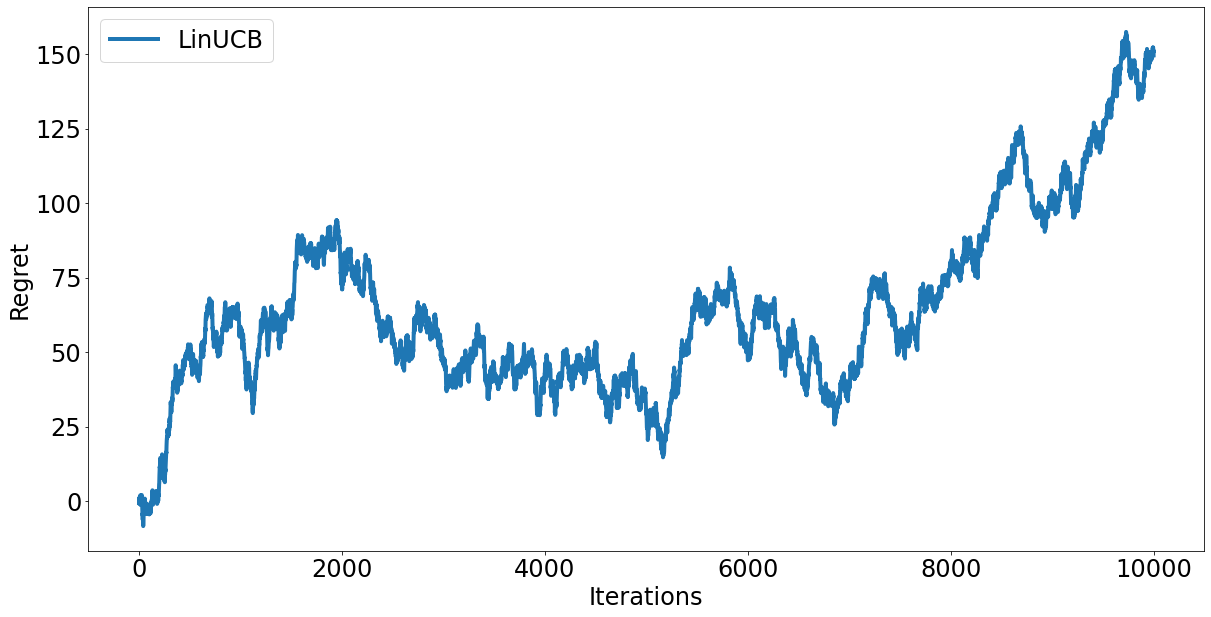

In [122]:
# Le regret sur une simu
plt.plot(regret_lin, label='LinUCB')
plt.xlabel('Iterations')
plt.ylabel('Regret')
plt.grid()
plt.legend()